In [86]:
!pip install -r requirements.txt

In [87]:
import pandas as pd
import numpy as np
import sys
from eep153_tools.sheets import read_sheets

In [210]:
Phil_data = '1z35Kyga40hhoGBEQIY9jReY6z1wmnsnlUVw-pFEaBhg'
 
x = read_sheets(Phil_data,sheet='Expenditures')
x.columns.name = 'i'
# Change 'ICRISAT' to key of your own sheet in Sheets, above
z = read_sheets(Phil_data,sheet="HH Characteristics")
z.columns.name = 'k'

# Assume a single market: (Comment this out to make each village its own market)
z['m'] = 1
x['m'] = 1

# x may have duplicate columns
x = x.groupby('i',axis=1).sum()
x = x.replace(0,np.nan) # Replace zeros with missing

# Take logs of expenditures; call this y
y = np.log(x.set_index(['j','t','m']))

z.set_index(['j','t','m'],inplace=True)

Key available for students@eep153.iam.gserviceaccount.com.
Key available for students@eep153.iam.gserviceaccount.com.


In [211]:
x.head()

i,Alcoholic drinks,Alugbati,Ampalaya,Atis,Atsal,Bagoong,Bamboo shoots,Banana,Beef,Birds,...,Sweet potato,Talong,Tomatoes,Transfer of residence,Upo,"Vetsin, MSG",Vinegar,j,m,t
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,30.0,NaN,...,NaN,NaN,5.0,NaN,NaN,5.00,1.25,2.0,1.0,2003.0
1,NaN,NaN,NaN,NaN,NaN,18.00,NaN,NaN,27.5,NaN,...,NaN,NaN,10.0,NaN,NaN,10.00,1.00,4.0,1.0,2003.0
2,22.0,NaN,NaN,NaN,NaN,0.75,NaN,NaN,NaN,NaN,...,NaN,NaN,6.0,NaN,NaN,5.00,1.25,5.0,1.0,2003.0
3,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,65.0,NaN,...,NaN,NaN,10.0,NaN,NaN,1.25,NaN,6.0,1.0,2003.0
4,NaN,NaN,5.0,NaN,6.25,NaN,NaN,NaN,NaN,NaN,...,21.0,10.0,5.0,NaN,7.0,20.00,5.00,12.0,1.0,2003.0


In [212]:
y.head()

,,i,Alcoholic drinks,Alugbati,Ampalaya,Atis,Atsal,Bagoong,Bamboo shoots,Banana,Beef,Birds,...,Soybean and other products,Squash,Sugar,Sweet potato,Talong,Tomatoes,Transfer of residence,Upo,"Vetsin, MSG",Vinegar
j,t,m,,,,,,,,,,,,,,,,,,,,,
2.0,2003.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.688879,3.401197,NaN,...,2.302585,0.223144,3.258097,NaN,NaN,1.609438,NaN,NaN,1.609438,0.223144
4.0,2003.0,1.0,NaN,NaN,NaN,NaN,NaN,2.890372,NaN,NaN,3.314186,NaN,...,2.995732,1.609438,2.302585,NaN,NaN,2.302585,NaN,NaN,2.302585,0.000000
5.0,2003.0,1.0,3.091042,NaN,NaN,NaN,NaN,-0.287682,NaN,NaN,NaN,NaN,...,NaN,NaN,0.916291,NaN,NaN,1.791759,NaN,NaN,1.609438,0.223144
6.0,2003.0,1.0,NaN,NaN,2.302585,NaN,NaN,NaN,NaN,NaN,4.174387,NaN,...,2.708050,0.916291,2.890372,NaN,NaN,2.302585,NaN,NaN,0.223144,NaN
12.0,2003.0,1.0,NaN,NaN,1.609438,NaN,1.832581,NaN,NaN,NaN,NaN,NaN,...,1.945910,NaN,3.401197,3.044522,2.302585,1.609438,NaN,1.94591,2.995732,1.609438


In [213]:
z.head()

,,k,Males 0-1,Males 1-5,Males 5-10,Males 10-15,Males 15-20,Males 20-30,Males 30-50,Males 50-60,Males 60-100,Females 0-1,Females 1-5,Females 5-10,Females 10-15,Females 15-20,Females 20-30,Females 30-50,Females 50-60,Females 60-100,log HSize
j,t,m,,,,,,,,,,,,,,,,,,,
100,2003,1,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,1,0,0,1.791759
101,2003,1,0,0,2,1,0,2,1,0,0,1,1,1,1,0,2,1,0,1,2.639057
102,2003,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,1,1,0,1.791759
103,2003,1,0,1,1,2,1,2,1,0,0,0,0,0,1,1,1,1,0,0,2.484907
105,2003,1,0,0,0,0,0,3,2,0,1,0,0,0,1,0,0,3,0,1,2.397895


In [214]:
import cfe

result = cfe.Result(y=y,z=z)
result

<xarray.Result>
Dimensions:           (k: 19, j: 572, t: 1, m: 1, i: 42)
Coordinates:
  * j                 (j) float64 2.0 4.0 5.0 6.0 ... 938.0 939.0 940.0 941.0
  * t                 (t) float64 2.003e+03
  * m                 (m) float64 1.0
  * i                 (i) <U45 'Alcoholic drinks' 'Ampalaya' ... 'Vinegar'
  * k                 (k) <U14 'Males 0-1' 'Males 1-5' ... 'log HSize'
Data variables: (12/20)
    alpha             object None
    beta              object None
    delta             object None
    prices            object None
    characteristics   (k, j, t, m) float64 0.0 0.0 0.0 0.0 ... 1.792 1.386 1.099
    loglambdas        object None
    ...                ...
    se_beta           object None
    se_alpha          object None
    se_a              object None
    y                 (i, j, t, m) float64 nan nan 3.091 ... -0.6931 1.946 2.996
    logp              object None
    z                 (k, j, t, m) float64 0.0 0.0 0.0 0.0 ... 1.792 1.386 1.099
Attributes:
    firstround:            2003.0
    min_proportion_items:  0.125
    min_xproducts:         30
    all_tm:                True
    common_alpha:          True
    useless_expenditures:  False
    stderr_tol:            0.01
    indices:               Indices(j='j', t='t', m='m', i='i', k='k')
    iterate:               False
    verbose:               False

In [215]:
result.get_reduced_form()

/opt/conda/lib/python3.9/site-packages/cfe/estimation.py:425: UserWarning: No variation in: (2003.0, 1.0)
  warnings.warn("No variation in: %s" % str(constant))


In [216]:
result.delta.to_dataframe().unstack('k')
#interpret data for every additional child c 0-0.5 we see a percent change in expenditures per child
#logHsize tells us about economy of scale in household. For every + 1 person you add you get a 1.066 increase in relative expenditure for millet

delta                       \
k                                             Males 0-1 Males 1-5 Males 5-10   
i                                                                              
Alcoholic drinks                               0.197734 -0.035662  -0.112759   
Ampalaya                                       0.040922  0.260205   0.340654   
Atsal                                          0.222673  0.130434   0.375754   
Bagoong                                       -0.048619  0.096351   0.069530   
Banana                                         0.278559  0.272695   0.196990   
Beef                                           0.244980  0.050033  -0.042359   
Calamansi                                     -0.126752  0.000233   0.215257   
Carrots                                        0.183419  0.165941  -0.061971   
Chicken                                        0.018365  0.035918   0.147542   
Coffee                                        -0.070886  0.026640   0.228824   
Coke                                           0.093237 -0.048168   0.000334   
Cooking oil                                   -0.091010  0.017945   0.018754   
Corn products                                  0.069938  0.219900  -0.068190   
Dried fish and smoked fish                    -0.221254 -0.145424  -0.008863   
Eggs                                           0.019769  0.066225   0.367595   
Food made from flour                           0.425483  0.282306   0.083094   
Fresh fish                                     0.116534  0.006374   0.053102   
Milk                                           0.820564  0.361618   0.103016   
Milo                                           0.460210  0.247974   0.299534   
Mongo and other products                      -0.002811  0.096757   0.108620   
Okra                                          -0.175372  0.164247  -0.057199   
Onions                                        -0.055077  0.088125   0.144452   
Other beverages                               -0.132743  0.213546  -0.025374   
Petsay                                         0.018256  0.104850   0.255912   
Pork                                          -0.019546  0.110280   0.106805   
Potato                                         0.006234  0.180211   0.085991   
Processed meat like longanisa                  0.431187  0.165657   0.041557   
Rice                                          -0.064246  0.017930   0.063701   
Rice products                                  0.064243  0.041342   0.229657   
Salt                                           0.062207  0.004582   0.077620   
Sardines like youngstown, etc                  0.017602 -0.084372   0.046664   
Sea weed                                       0.413241  0.064980   0.019803   
Sitao                                         -0.025254 -0.079047   0.161367   
Snaks like chippy, cheese curls, bread sticks  0.204075  0.121520  -0.450382   
Soybean and other products                    -0.051111  0.080728   0.215943   
Squash                                         0.294856 -0.068069   0.176868   
Sugar                                          0.135650  0.084534   0.150877   
Sweet potato                                  -0.002968  0.002606   0.242441   
Talong                                        -0.413523  0.140420   0.241164   
Tomatoes                                      -0.041397  0.027062   0.067845   
Vetsin, MSG                                   -0.042219  0.085667   0.048300   
Vinegar                                        0.133036 -0.047349   0.003437   

                                                                       \
k                                             Males 10-15 Males 15-20   
i                                                                       
Alcoholic drinks                                -0.238435    0.056806   
Ampalaya                                         0.239278    0.156066   
Atsal                                            0.012965    0.013716   
Bagoong    

In [217]:
result.a.to_dataframe().unstack('i')
#effective prices within markets
#add.mean(axis =1) returns a price index

a                                                   \
i          Alcoholic drinks Ampalaya     Atsal   Bagoong    Banana      Beef   
t      m                                                                       
2003.0 1.0         2.667633  2.49471  1.643557  1.052378  2.579405  3.403645   

                                                    ...            \
i          Calamansi   Carrots   Chicken    Coffee  ...     Sitao   
t      m                                            ...             
2003.0 1.0  1.448823  1.484986  2.407365  2.185711  ...  1.362162   

                                                          \
i          Snaks like chippy, cheese curls, bread sticks   
t      m                                                   
2003.0 1.0                                     -0.111871   

                                                                        \
i          Soybean and other products    Squash     Sugar Sweet potato   
t      m                                                                 
2003.0 1.0                   2.053984  2.006581  2.344363     2.084173   

                                                      
i             Talong  Tomatoes Vetsin, MSG   Vinegar  
t      m                                              
2003.0 1.0  1.778438  1.720865    1.308317  0.348152  

[1 rows x 42 columns]

In [218]:
import matplotlib.pyplot as plt

In [223]:
result.get_alpha(as_df = True)

i
Alcoholic drinks                                 2.667633
Ampalaya                                         2.494710
Atsal                                            1.643557
Bagoong                                          1.052378
Banana                                           2.579405
Beef                                             3.403645
Calamansi                                        1.448823
Carrots                                          1.484986
Chicken                                          2.407365
Coffee                                           2.185711
Coke                                             3.167237
Cooking oil                                      2.311288
Corn products                                    1.061467
Dried fish and smoked fish                       2.362852
Eggs                                             2.704676
Food made from flour                             3.008316
Fresh fish                                       3.410733
Milk        

In [96]:
result.get_alpha(as_df = True).sort_values()
#log of the share for the median household's expenditure plan

i
Snaks like chippy, cheese curls, bread sticks   -0.111871
Vinegar                                          0.348152
Petsay                                           0.408223
Salt                                             0.566071
Bagoong                                          1.052378
Corn products                                    1.061467
Vetsin, MSG                                      1.308317
Sitao                                            1.362162
Calamansi                                        1.448823
Carrots                                          1.484986
Okra                                             1.496949
Atsal                                            1.643557
Tomatoes                                         1.720865
Sea weed                                         1.757412
Talong                                           1.778438
Onions                                           1.838909
Mongo and other products                         1.880042
Other bevera

In [97]:
result.get_beta(as_df=True).sort_values()
#- stuff = well to do households don't consume
#+ stuff = more well to do households consume more

i
Rice                                             0.184943
Potato                                           0.221563
Sweet potato                                     0.245270
Vinegar                                          0.247479
Bagoong                                          0.259025
Salt                                             0.262367
Sugar                                            0.265524
Vetsin, MSG                                      0.308093
Dried fish and smoked fish                       0.309520
Alcoholic drinks                                 0.350425
Corn products                                    0.361575
Rice products                                    0.365417
Other beverages                                  0.368708
Soybean and other products                       0.376620
Food made from flour                             0.387989
Carrots                                          0.389049
Coffee                                           0.394683
Mongo and ot

In [98]:
result.delta.to_dataframe().unstack('k')

delta                       \
k                                             Males 0-1 Males 1-5 Males 5-10   
i                                                                              
Alcoholic drinks                               0.197734 -0.035662  -0.112759   
Ampalaya                                       0.040922  0.260205   0.340654   
Atsal                                          0.222673  0.130434   0.375754   
Bagoong                                       -0.048619  0.096351   0.069530   
Banana                                         0.278559  0.272695   0.196990   
Beef                                           0.244980  0.050033  -0.042359   
Calamansi                                     -0.126752  0.000233   0.215257   
Carrots                                        0.183419  0.165941  -0.061971   
Chicken                                        0.018365  0.035918   0.147542   
Coffee                                        -0.070886  0.026640   0.228824   
Coke                                           0.093237 -0.048168   0.000334   
Cooking oil                                   -0.091010  0.017945   0.018754   
Corn products                                  0.069938  0.219900  -0.068190   
Dried fish and smoked fish                    -0.221254 -0.145424  -0.008863   
Eggs                                           0.019769  0.066225   0.367595   
Food made from flour                           0.425483  0.282306   0.083094   
Fresh fish                                     0.116534  0.006374   0.053102   
Milk                                           0.820564  0.361618   0.103016   
Milo                                           0.460210  0.247974   0.299534   
Mongo and other products                      -0.002811  0.096757   0.108620   
Okra                                          -0.175372  0.164247  -0.057199   
Onions                                        -0.055077  0.088125   0.144452   
Other beverages                               -0.132743  0.213546  -0.025374   
Petsay                                         0.018256  0.104850   0.255912   
Pork                                          -0.019546  0.110280   0.106805   
Potato                                         0.006234  0.180211   0.085991   
Processed meat like longanisa                  0.431187  0.165657   0.041557   
Rice                                          -0.064246  0.017930   0.063701   
Rice products                                  0.064243  0.041342   0.229657   
Salt                                           0.062207  0.004582   0.077620   
Sardines like youngstown, etc                  0.017602 -0.084372   0.046664   
Sea weed                                       0.413241  0.064980   0.019803   
Sitao                                         -0.025254 -0.079047   0.161367   
Snaks like chippy, cheese curls, bread sticks  0.204075  0.121520  -0.450382   
Soybean and other products                    -0.051111  0.080728   0.215943   
Squash                                         0.294856 -0.068069   0.176868   
Sugar                                          0.135650  0.084534   0.150877   
Sweet potato                                  -0.002968  0.002606   0.242441   
Talong                                        -0.413523  0.140420   0.241164   
Tomatoes                                      -0.041397  0.027062   0.067845   
Vetsin, MSG                                   -0.042219  0.085667   0.048300   
Vinegar                                        0.133036 -0.047349   0.003437   

                                                                       \
k                                             Males 10-15 Males 15-20   
i                                                                       
Alcoholic drinks                                -0.238435    0.056806   
Ampalaya                                         0.239278    0.156066   
Atsal                                            0.012965    0.013716   
Bagoong    

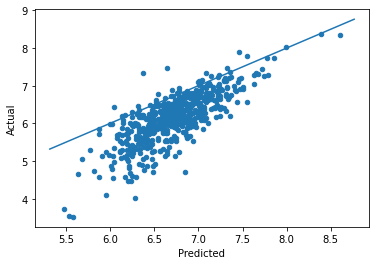

In [99]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

xbar = np.exp(result.y).sum(['m','i']).to_dataframe('xbar').replace(0,np.nan).squeeze()
xhat = result.get_predicted_expenditures().sum(['m','i']).to_dataframe('xhat').replace(0,np.nan).squeeze()

# Make dataframe of actual & predicted
df = pd.DataFrame({'Actual':np.log(xbar),'Predicted':np.log(xhat)})

df.plot.scatter(x='Predicted',y='Actual')

# Add 45 degree line
v = plt.axis()
vmin = np.max([v[0],v[2]])
vmax = np.max([v[1],v[3]])
plt.plot([vmin,vmax],[vmin,vmax])

In [100]:
#part B nutritional
food_data = read_sheets('1c9vWhkW5qfWcosMP94E7U3FuD8DKFbkcpmmTJlfL_so',sheet = 'Sheet2')
food_data

Key available for students@eep153.iam.gserviceaccount.com.


,Food,FDC,
0,Alcoholic drinks,168749,
1,Alugbati,169400,mabulati spinach
2,Ampalaya,1103462,bitter melon
3,Atis,168175,sugar apple
4,Atsal,170108,bell/sweet pepper
...,...,...,...
67,Sugar,2021609,
68,Sweet potato,1993823,
69,Talong,1103353,eggplant
70,Tomatoes,1103276,


In [101]:
import fooddatacentral as fdc
apikey = "98io1g6FBoC8R3VH3ixwfMmoZHEtTge9UyS9kouU"
id = 169400    # Put an FDC ID HERE!
fdc.nutrients(apikey,fdc_id=id)

,Quantity,Units
Proximates,0.000,g
Water,92.500,g
Energy,96.000,kJ
Protein,2.980,g
Total lipid (fat),0.780,g
Ash,1.040,g
Carbohydrates,0.000,g
"Carbohydrate, by difference",2.710,g
"Fiber, total dietary",2.100,g
Minerals,0.000,mg


In [102]:
df = food_data

In [103]:
#the original class function
import warnings
apikey = "98io1g6FBoC8R3VH3ixwfMmoZHEtTge9UyS9kouU" 

D = {}
count = 0
for food in  df.Food.tolist():
    try:
        FDC = df.loc[df.Food==food,:].FDC[count]
        count+=1
        D[food] = fdc.nutrients(apikey,FDC).Quantity
    except AttributeError: 
        warnings.warn("Couldn't find FDC Code %s for food %s." % (food,FDC))        

D = pd.DataFrame(D,dtype=float)

D

,Alcoholic drinks,Alugbati,Ampalaya,Atis,Atsal,Bagoong,Bamboo shoots,Banana,Beef,Birds,...,Sitao,"Snaks like chippy, cheese curls, bread sticks",Snaks like potato chips,Soybean and other products,Squash,Sugar,Sweet potato,Talong,Tomatoes,Upo
Alanine,0.01,NaN,NaN,NaN,0.026,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.582,NaN,NaN,NaN,NaN,NaN,NaN
"Alcohol, ethyl",3.10,NaN,0.00,0.00,0.000,0.00,0.00,0.00,NaN,NaN,...,0.00,NaN,NaN,NaN,0.00,NaN,NaN,0.00,0.00,0.000
Amino acids,0.00,NaN,0.00,0.00,0.000,0.00,0.00,0.00,NaN,NaN,...,0.00,NaN,NaN,0.000,0.00,NaN,NaN,0.00,0.00,0.000
Arginine,0.00,NaN,NaN,NaN,0.036,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.042,NaN,NaN,NaN,NaN,NaN,0.014
Ash,0.09,1.04,NaN,0.78,0.470,NaN,NaN,NaN,1.22,0.98,...,NaN,NaN,NaN,1.700,NaN,NaN,NaN,NaN,NaN,0.430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vitamin K (Menaquinone-4),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vitamin K (phylloquinone),0.00,NaN,7.00,NaN,4.900,0.00,2.40,0.50,NaN,NaN,...,43.00,NaN,NaN,NaN,3.70,NaN,NaN,3.50,7.90,NaN
Vitamins and Other Components,0.00,0.00,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,...,0.00,NaN,NaN,0.000,0.00,NaN,NaN,0.00,0.00,0.000
Water,94.88,92.50,91.28,73.23,92.210,71.07,91.90,74.91,65.70,69.90,...,90.32,NaN,NaN,67.500,88.18,NaN,NaN,92.30,94.52,95.540


In [202]:
pd.DataFrame(D.T.sort_values(by=['Folate, DFE'],ascending = False)['Folate, DFE'])

,"Folate, DFE"
Kadios and copeas,456.0
Food made from flour,288.0
Corn grits,263.0
Peanut,240.0
Sea weed,174.0
...,...
Shrimps and shellfish,NaN
"Snaks like chippy, cheese curls, bread sticks",NaN
Snaks like potato chips,NaN
Sugar,NaN


In [104]:
InputFiles = {'Expenditures':('1z35Kyga40hhoGBEQIY9jReY6z1wmnsnlUVw-pFEaBhg','Expenditures'),
              'Quantities':('1z35Kyga40hhoGBEQIY9jReY6z1wmnsnlUVw-pFEaBhg','Quantities'),
              'HH Characteristics':('1z35Kyga40hhoGBEQIY9jReY6z1wmnsnlUVw-pFEaBhg','HH Characteristics'),
              'FCT':('1z35Kyga40hhoGBEQIY9jReY6z1wmnsnlUVw-pFEaBhg','FCT')
              }

In [105]:
def get_clean_sheet(key,sheet=None):

    df = read_sheets(key,sheet=sheet)
    df.columns = [c.strip() for c in df.columns.tolist()]

    df = df.loc[:,~df.columns.duplicated(keep='first')]   

    df = df.drop([col for col in df.columns if col.startswith('Unnamed')], axis=1)

    df = df.loc[~df.index.duplicated(), :]

    return df

# Get expenditures...
x = get_clean_sheet(InputFiles['Expenditures'][0],
                    sheet=InputFiles['Expenditures'][1])

if 'm' not in x.columns:
    x['m'] = 1

x = x.set_index(['j','t','m'])
x.columns.name = 'i'

x = x.apply(lambda x: pd.to_numeric(x,errors='coerce'))
x = x.replace(0,np.nan)

# Get HH characteristics...
z = get_clean_sheet(InputFiles['HH Characteristics'][0],
                    sheet=InputFiles['HH Characteristics'][1])

if 'm' not in z.columns:
    z['m'] = 1

z = z.set_index(['j','t','m'])
z.columns.name = 'k'

z = z.apply(lambda x: pd.to_numeric(x,errors='coerce'))

# Get purchased consumption quantities
q = get_clean_sheet(InputFiles['Quantities'][0],
                    sheet=InputFiles['Quantities'][1])

if 'm' not in q.columns:
    q['m'] = 1

q = q.set_index(['j','t','m','u'])
q.columns.name = 'i'

q = q.apply(lambda x: pd.to_numeric(x,errors='coerce'))
q = q.replace(0,np.nan)
#
#fct = get_clean_sheet(InputFiles['FCT'][0],
                   #sheet=InputFiles['FCT'][1])

#### This bit peculiar to Niger FCT #####
#fct = fct.loc[fct.Code.str.len()==6]
#fct = fct.set_index('Code')
#fct.columns = [v.replace('\n',' ') for v in fct.columns]
########################################

#fct.index.name = 'i'

#fct = fct.apply(lambda x: pd.to_numeric(x,errors='coerce'))

Key available for students@eep153.iam.gserviceaccount.com.
Key available for students@eep153.iam.gserviceaccount.com.
Key available for students@eep153.iam.gserviceaccount.com.


In [106]:
import cfe

result = cfe.Result(y=np.log(x),z=z)

# Estimates most things (not counting std errors for betas).
xhat = result.get_predicted_expenditures() 

result.get_beta(as_df=True).sort_values(ascending=False) # Check sanity...

/opt/conda/lib/python3.9/site-packages/cfe/estimation.py:425: UserWarning: No variation in: (2003, 'Bukidnon')
  warnings.warn("No variation in: %s" % str(constant))


i
Petsay                                           0.609025
Calamansi                                        0.564664
Atsal                                            0.528700
Banana                                           0.525432
Fresh fish                                       0.521359
Talong                                           0.519613
Eggs                                             0.506493
Milk                                             0.497405
Tomatoes                                         0.495276
Onions                                           0.494757
Sitao                                            0.493720
Chicken                                          0.482555
Sea weed                                         0.461148
Ampalaya                                         0.455246
Milo                                             0.454363
Coke                                             0.448413
Processed meat like longanisa                    0.442699
Cooking oil 

In [107]:
#get quantities
#just remember this is price per gram
# xhat is an xarray; change to df
xhatdf = xhat.to_dataset('i').to_dataframe()
xhatdf.columns.name ='i'
q = q/1000
phat = xhatdf/q

# Keep kgs; currently price per gram CHANGED TO KG but didn't change unit
phat = phat.xs('g',level='u').groupby(['t','m']).median().T.dropna(how='all')

In [108]:
phat

t,2003
m,Bukidnon
i,
Alcoholic drinks,58.758874
Ampalaya,21.223047
Atsal,48.581074
Bagoong,37.555353
Banana,21.240307
Beef,137.783760
Calamansi,23.483845
Carrots,28.718425


In [109]:
q

,,,i,Alcoholic drinks,Alugbati,Ampalaya,Atis,Atsal,Bagoong,Bamboo shoots,Banana,Beef,Birds,...,Soybean and other products,Squash,Sugar,Sweet potato,Talong,Tomatoes,Transfer of residence,Upo,"Vetsin, MSG",Vinegar
j,t,m,u,,,,,,,,,,,,,,,,,,,,,
2,2003,Bukidnon,g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.128,0.25,NaN,...,0.325,0.1250,1.000,NaN,NaN,0.50000,NaN,NaN,0.360,0.008
4,2003,Bukidnon,g,NaN,NaN,NaN,NaN,NaN,0.424,NaN,NaN,0.25,NaN,...,0.720,0.5000,0.500,NaN,NaN,0.50000,NaN,NaN,0.680,0.006
5,2003,Bukidnon,g,0.670,NaN,NaN,NaN,NaN,0.050,NaN,NaN,NaN,NaN,...,NaN,NaN,0.125,NaN,NaN,0.11100,NaN,NaN,0.360,0.006
6,2003,Bukidnon,g,NaN,NaN,0.175,NaN,NaN,NaN,NaN,NaN,0.50,NaN,...,0.720,0.3125,0.750,NaN,NaN,0.50000,NaN,NaN,0.090,NaN
12,2003,Bukidnon,g,NaN,NaN,0.500,NaN,0.0300,NaN,NaN,NaN,NaN,NaN,...,0.325,NaN,1.000,3.000,0.5,0.37000,NaN,1.0,0.726,0.032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,2003,Bukidnon,g,0.359,NaN,0.125,NaN,0.0400,0.048,NaN,NaN,NaN,NaN,...,0.192,NaN,1.500,NaN,0.5,NaN,NaN,NaN,0.363,0.012
938,2003,Bukidnon,g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.128,NaN,NaN,...,0.075,NaN,1.000,0.496,NaN,NaN,NaN,NaN,NaN,0.002
939,2003,Bukidnon,g,NaN,NaN,NaN,NaN,0.0025,0.065,NaN,NaN,NaN,NaN,...,0.450,NaN,0.500,NaN,NaN,0.01525,NaN,NaN,0.726,0.003


In [110]:
result['prices'] = phat.stack().to_xarray().to_array()

# Make this persistent...
result.to_dataset('./foo.ds')

<xarray.Dataset>
Dimensions:           (j: 572, i: 42, k: 19, variable: 1, m: 1, t: 1, kp: 19)
Coordinates:
  * j                 (j) int64 2 4 5 6 12 13 14 ... 935 936 937 938 939 940 941
  * t                 (t) int64 2003
  * m                 (m) object 'Bukidnon'
  * i                 (i) object 'Alcoholic drinks' 'Ampalaya' ... 'Vinegar'
  * k                 (k) <U14 'Males 0-1' 'Males 1-5' ... 'log HSize'
  * kp                (kp) <U14 'Males 0-1' 'Males 1-5' ... 'log HSize'
  * variable          (variable) int64 2003
Data variables: (12/20)
    alpha             object None
    beta              (i) float64 0.3504 0.4552 0.5287 ... 0.4953 0.3081 0.2475
    delta             (k, i) float64 0.1977 0.04092 0.2227 ... -0.163 0.1419
    prices            (variable, i, m) float64 58.76 21.22 48.58 ... 15.91 216.4
    characteristics   (k, j, t, m) float64 0.0 0.0 0.0 0.0 ... 1.792 1.386 1.099
    loglambdas        (j, t, m) float64 -0.3177 -1.481 1.001 ... -1.071 -1.366
    ...                ...
    se_beta           object None
    se_alpha          object None
    se_a              (i, t, m) float64 0.05653 0.05677 ... 0.03243 0.03187
    y                 (i, j, t, m) float64 nan nan 3.091 ... -0.6931 1.946 2.996
    logp              object None
    z                 (k, j, t, m) float64 0.0 0.0 0.0 0.0 ... 1.792 1.386 1.099

/opt/conda/lib/python3.9/site-packages/cfe/estimation.py:425: UserWarning: No variation in: (2003, 'Bukidnon')
  warnings.warn("No variation in: %s" % str(constant))


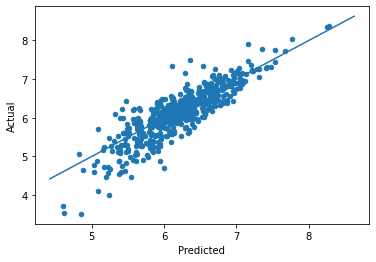

In [111]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

zeros_r = cfe.Result(y=(0.+(np.exp(result.y)>0)),z=result.z)
weights = zeros_r.get_predicted_log_expenditures()

# Truncate to make weights live in [0,1]
weights = weights.where((weights<1) + np.isnan(weights),1).where((weights>0) + np.isnan(weights),0)

xbar = np.exp(result.y).sum(['m','i']).to_dataframe('xbar').replace(0,np.nan).squeeze()

# Calculate *expected* predicted expenditures, to make unconditional on being positive
xhat = (weights*result.get_predicted_expenditures())
xsum = xhat.sum(['m','i']).to_dataframe('xhat').replace(0,np.nan).squeeze()

# Make dataframe of actual & predicted
df = pd.DataFrame({'Actual':np.log(xbar),'Predicted':np.log(xsum)})

df.plot.scatter(x='Predicted',y='Actual')

# Add 45 degree line
v = plt.axis()
vmin = np.max([v[0],v[2]])
vmax = np.max([v[1],v[3]])
plt.plot([vmin,vmax],[vmin,vmax])

In [112]:
xhatdf = xhat.to_dataset('i').to_dataframe()
xhatdf.columns.name ='i'

qhat = xhatdf.div(phat.T,axis=1)

qhat

i                  Alcoholic drinks  Ampalaya     Atsal   Bagoong    Banana  \
t    m        j                                                               
2003 Bukidnon 2            0.116675  0.180845  0.070737  0.104735  0.535616   
              4            0.263493  0.121029  0.043298  0.241492  0.267606   
              5            0.118999  0.034656  0.011726  0.086891  0.088410   
              6            0.725667  0.464169  0.119642  0.372024  0.294653   
              12           0.718352  0.331599  0.114942  0.202801  0.449777   
...                             ...       ...       ...       ...       ...   
              937          0.248027  0.187051  0.070215  0.138916  0.430214   
              938          0.142096  0.056473  0.030601  0.154113  0.189452   
              939          0.049766  0.015068  0.005227  0.060880  0.065395   
              940          0.244454  0.282499  0.106078  0.181067  0.350029   
              941          0.257039  0.199785  0.063432  0.160448  0.350606   

i                      Beef  Calamansi   Carrots   Chicken    Coffee  ...  \
t    m        j                                                       ...   
2003 Bukidnon 2    0.141411   0.254091  0.119983  0.140873  0.011864  ...   
              4    0.100360   0.063632  0.010899  0.218645  0.018773  ...   
              5    0.027094   0.014495  0.017024  0.017785  0.005193  ...   
              6    0.182061   0.284434  0.158320  0.445761  0.017658  ...   
              12   0.520769   0.088118  0.113430  0.340136  0.013133  ...   
...                     ...        ...       ...       ...       ...  ...   
              937  0.118886   0.104625  0.084891  0.156475  0.011480  ...   
              938  0.037350   0.040618  0.036757  0.051543  0.009546  ...   
              939  0.025093   0.025280  0.013814  0.015064  0.002924  ...   
              940  0.133108   0.170107  0.109334  0.187612  0.011555  ...   
              941  0.071872   0.105895  0.044981  0.139542  0.017963  ...   

i                     Sitao  Snaks like chippy, cheese curls, bread sticks  \
t    m        j                                                              
2003 Bukidnon 2    0.232598                                       0.008249   
              4    0.090696                                       0.014265   
              5    0.023254                                       0.002964   
              6    0.131597                                       0.028579   
              12   0.183839                                       0.005449   
...                     ...                                            ...   
              937  0.127305                                       0.041984   
              938  0.039993                                       0.019544   
              939  0.022631                                       0.004828   
              940  0.182608                                       0.011533   
              941  0.113260                                       0.024931   

i                  Soybean and other products    Squash     Sugar  \
t    m        j                                                     
2003 Bukidnon 2                      0.314520  0.267375  0.876209   
              4                      0.370420  0.352767  0.946566   
              5                      0.164222  0.094219  0.418991   
              6                      0.358473  0.412318  1.216201   
              12                     0.255079  0.602827  1.054536   
...                                       ...       ...       ...   
              937                    0.279057  0.326839  0.756972   
              938                    0.220004  0.207797  0.730359   
              939                    0.081418  0.041203  0.322617   
              940                    0.378169  0.395769  0.908191   
              941                    0.385286  0.302659  0.873780   

i                  Sweet potato    Talong  Tomatoes  Vets

In [113]:
print(pd.Series(xhat.coords['i']).to_markdown())

|    | 0                                             |
|---:|:----------------------------------------------|
|  0 | Alcoholic drinks                              |
|  1 | Ampalaya                                      |
|  2 | Atsal                                         |
|  3 | Bagoong                                       |
|  4 | Banana                                        |
|  5 | Beef                                          |
|  6 | Calamansi                                     |
|  7 | Carrots                                       |
|  8 | Chicken                                       |
|  9 | Coffee                                        |
| 10 | Coke                                          |
| 11 | Cooking oil                                   |
| 12 | Corn products                                 |
| 13 | Dried fish and smoked fish                    |
| 14 | Eggs                                          |
| 15 | Food made from flour                          |
| 16 | Fre

In [114]:
fct = D.T

In [115]:
food_data_2 =  read_sheets('1c9vWhkW5qfWcosMP94E7U3FuD8DKFbkcpmmTJlfL_so',sheet = 'Sheet2').iloc[:,0:2]

Key available for students@eep153.iam.gserviceaccount.com.


In [116]:
food_data_2

,Food,FDC
0,Alcoholic drinks,168749
1,Alugbati,169400
2,Ampalaya,1103462
3,Atis,168175
4,Atsal,170108
...,...,...
67,Sugar,2021609
68,Sweet potato,1993823
69,Talong,1103353
70,Tomatoes,1103276


In [117]:
fct.index = food_data_2['FDC'].values

In [118]:
q

,,,i,Alcoholic drinks,Alugbati,Ampalaya,Atis,Atsal,Bagoong,Bamboo shoots,Banana,Beef,Birds,...,Soybean and other products,Squash,Sugar,Sweet potato,Talong,Tomatoes,Transfer of residence,Upo,"Vetsin, MSG",Vinegar
j,t,m,u,,,,,,,,,,,,,,,,,,,,,
2,2003,Bukidnon,g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.128,0.25,NaN,...,0.325,0.1250,1.000,NaN,NaN,0.50000,NaN,NaN,0.360,0.008
4,2003,Bukidnon,g,NaN,NaN,NaN,NaN,NaN,0.424,NaN,NaN,0.25,NaN,...,0.720,0.5000,0.500,NaN,NaN,0.50000,NaN,NaN,0.680,0.006
5,2003,Bukidnon,g,0.670,NaN,NaN,NaN,NaN,0.050,NaN,NaN,NaN,NaN,...,NaN,NaN,0.125,NaN,NaN,0.11100,NaN,NaN,0.360,0.006
6,2003,Bukidnon,g,NaN,NaN,0.175,NaN,NaN,NaN,NaN,NaN,0.50,NaN,...,0.720,0.3125,0.750,NaN,NaN,0.50000,NaN,NaN,0.090,NaN
12,2003,Bukidnon,g,NaN,NaN,0.500,NaN,0.0300,NaN,NaN,NaN,NaN,NaN,...,0.325,NaN,1.000,3.000,0.5,0.37000,NaN,1.0,0.726,0.032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,2003,Bukidnon,g,0.359,NaN,0.125,NaN,0.0400,0.048,NaN,NaN,NaN,NaN,...,0.192,NaN,1.500,NaN,0.5,NaN,NaN,NaN,0.363,0.012
938,2003,Bukidnon,g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.128,NaN,NaN,...,0.075,NaN,1.000,0.496,NaN,NaN,NaN,NaN,NaN,0.002
939,2003,Bukidnon,g,NaN,NaN,NaN,NaN,0.0025,0.065,NaN,NaN,NaN,NaN,...,0.450,NaN,0.500,NaN,NaN,0.01525,NaN,NaN,0.726,0.003


In [119]:
fct

,Alanine,"Alcohol, ethyl",Amino acids,Arginine,Ash,Aspartic acid,Beta-sitostanol,Beta-sitosterol,Betaine,Brassicasterol,...,Vitamin D2 (ergocalciferol),Vitamin D3 (cholecalciferol),Vitamin E (alpha-tocopherol),"Vitamin E, added",Vitamin K (Dihydrophylloquinone),Vitamin K (Menaquinone-4),Vitamin K (phylloquinone),Vitamins and Other Components,Water,"Zinc, Zn"
168749,0.010,3.1,0.0,0.000,0.09,0.013,NaN,NaN,NaN,NaN,...,NaN,NaN,0.00,0.0,0.0,NaN,0.0,0.0,94.88,0.01
169400,NaN,NaN,NaN,NaN,1.04,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,92.50,0.30
1103462,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.43,0.0,NaN,NaN,7.0,0.0,91.28,0.75
168175,NaN,0.0,0.0,NaN,0.78,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,73.23,0.10
170108,0.026,0.0,0.0,0.036,0.47,0.284,NaN,NaN,0.1,NaN,...,NaN,NaN,1.58,0.0,0.0,NaN,4.9,0.0,92.21,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1103353,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.30,0.0,NaN,NaN,3.5,0.0,92.30,0.16
1103276,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.54,0.0,NaN,NaN,7.9,0.0,94.52,0.17


In [120]:
# Dictionary mapping index i to fct codes
food_data_2 =  read_sheets('1c9vWhkW5qfWcosMP94E7U3FuD8DKFbkcpmmTJlfL_so',sheet = 'Sheet2').iloc[:,0:2]
i_to_fct = food_data_2.dropna().set_index('Food').squeeze().to_dict()

# Create version of qhat with fct ids for labels
myq = qhat.rename(columns=i_to_fct)
use_columns = myq.columns.intersection(i_to_fct.values())
myq = myq[use_columns]

# Drop goods with no obs, households with no goods
myq = myq.dropna(how='all',axis=1).dropna(how='all')

# Create version of fct with just foods in myq
myfct=fct.loc[myq.columns].iloc[:,8:] # Drop columns which aren't nutrients

Key available for students@eep153.iam.gserviceaccount.com.


In [121]:
myfct
#maps each food items food id to the nutrients

,Betaine,Brassicasterol,Caffeine,"Calcium, Ca",Campestanol,Campesterol,"Carbohydrate, by difference",Carbohydrates,"Carotene, alpha","Carotene, beta",...,Vitamin D2 (ergocalciferol),Vitamin D3 (cholecalciferol),Vitamin E (alpha-tocopherol),"Vitamin E, added",Vitamin K (Dihydrophylloquinone),Vitamin K (Menaquinone-4),Vitamin K (phylloquinone),Vitamins and Other Components,Water,"Zinc, Zn"
168749,NaN,NaN,0.0,4.0,NaN,NaN,1.64,0.0,0.0,0.0,...,NaN,NaN,0.00,0.0,0.0,NaN,0.0,0.0,94.88,0.01
1103462,NaN,NaN,0.0,9.0,NaN,NaN,4.19,0.0,0.0,71.0,...,NaN,NaN,0.43,0.0,NaN,NaN,7.0,0.0,91.28,0.75
170108,0.1,NaN,0.0,7.0,NaN,NaN,6.03,0.0,20.0,1624.0,...,NaN,NaN,1.58,0.0,0.0,NaN,4.9,0.0,92.21,0.25
1099270,NaN,NaN,0.0,43.0,NaN,NaN,3.64,0.0,0.0,0.0,...,NaN,NaN,0.00,0.0,NaN,NaN,0.0,0.0,71.07,0.20
1102653,NaN,NaN,0.0,5.0,NaN,NaN,22.84,0.0,25.0,26.0,...,NaN,NaN,0.10,0.0,NaN,NaN,0.5,0.0,74.91,0.15
746758,NaN,NaN,NaN,13.0,NaN,NaN,0.00,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,65.70,3.70
2116524,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170393,0.4,NaN,0.0,33.0,NaN,NaN,9.58,0.0,3477.0,8285.0,...,NaN,NaN,0.66,0.0,0.0,NaN,13.2,0.0,88.29,0.24
331897,NaN,NaN,NaN,12.0,NaN,NaN,0.00,0.0,NaN,NaN,...,NaN,0.1,0.17,NaN,NaN,NaN,NaN,0.0,69.90,2.54
331897,NaN,NaN,NaN,12.0,NaN,NaN,0.00,0.0,NaN,NaN,...,NaN,0.1,0.17,NaN,NaN,NaN,NaN,0.0,69.90,2.54


In [122]:
myq

i                   168749    1103462   170108    1099270   1102653   746758   \
t    m        j                                                                 
2003 Bukidnon 2    0.116675  0.180845  0.070737  0.104735  0.535616  0.141411   
              4    0.263493  0.121029  0.043298  0.241492  0.267606  0.100360   
              5    0.118999  0.034656  0.011726  0.086891  0.088410  0.027094   
              6    0.725667  0.464169  0.119642  0.372024  0.294653  0.182061   
              12   0.718352  0.331599  0.114942  0.202801  0.449777  0.520769   
...                     ...       ...       ...       ...       ...       ...   
              937  0.248027  0.187051  0.070215  0.138916  0.430214  0.118886   
              938  0.142096  0.056473  0.030601  0.154113  0.189452  0.037350   
              939  0.049766  0.015068  0.005227  0.060880  0.065395  0.025093   
              940  0.244454  0.282499  0.106078  0.181067  0.350029  0.133108   
              941  0.257039  0.199785  0.063432  0.160448  0.350606  0.071872   

i                   2116524   170393    331897    171881   ...   1098981  \
t    m        j                                            ...             
2003 Bukidnon 2    0.254091  0.119983  0.140873  0.011864  ...  0.194805   
              4    0.063632  0.010899  0.218645  0.018773  ...  0.241485   
              5    0.014495  0.017024  0.017785  0.005193  ...  0.081826   
              6    0.284434  0.158320  0.445761  0.017658  ...  0.454705   
              12   0.088118  0.113430  0.340136  0.013133  ...  0.306961   
...                     ...       ...       ...       ...  ...       ...   
              937  0.104625  0.084891  0.156475  0.011480  ...  0.190418   
              938  0.040618  0.036757  0.051543  0.009546  ...  0.178812   
              939  0.025280  0.013814  0.015064  0.002924  ...  0.093714   
              940  0.170107  0.109334  0.187612  0.011555  ...  0.267365   
              941  0.105895  0.044981  0.139542  0.017963  ...  0.227653   

i                   1103376   1103337   1859255   169282    1103226   2021609  \
t    m        j                                                                 
2003 Bukidnon 2    0.034837  0.232598  0.008249  0.314520  0.267375  0.876209   
              4    0.056999  0.090696  0.014265  0.370420  0.352767  0.946566   
              5    0.025909  0.023254  0.002964  0.164222  0.094219  0.418991   
              6    0.213640  0.131597  0.028579  0.358473  0.412318  1.216201   
              12   0.188664  0.183839  0.005449  0.255079  0.602827  1.054536   
...                     ...       ...       ...       ...       ...       ...   
              937  0.120793  0.127305  0.041984  0.279057  0.326839  0.756972   
              938  0.059622  0.039993  0.019544  0.220004  0.207797  0.730359   
              939  0.007386  0.022631  0.004828  0.081418  0.041203  0.322617   
              940  0.116200  0.182608  0.011533  0.378169  0.395769  0.908191   
              941  0.109499  0.113260  0.024931  0.385286  0.302659  0.873780   

i                   1993823   1103353   1103276  
t    m        j                                  
2003 Bukidnon 2    0.097889  0.297771  0.263869  
              4    0.212825  0.269503  0.171874  
              5    0.114878  0.068098  0.052292  
              6    0.462883  0.561249  0.633775  
              12   0.601010  0.656290  0.317997  
...                     ...       ...       ...  
              937  0.335328  0.477885  0.215227  
              938  0.277396  0.117545  0.104136  
              939  0.059621  0.034227  0.038990  
              940  0.244098  0.430665  0.279041  
              941  0.212806  0.302278  0.209467  

[566 rows x 37 columns]

In [142]:
#for work only, when I need to reset z
Phil_data = '1z35Kyga40hhoGBEQIY9jReY6z1wmnsnlUVw-pFEaBhg'
 
x = read_sheets(Phil_data,sheet='Expenditures')
x.columns.name = 'i'
# Change 'ICRISAT' to key of your own sheet in Sheets, above
z = read_sheets(Phil_data,sheet="HH Characteristics")
z.columns.name = 'k'

# Assume a single market: (Comment this out to make each village its own market)
z['m'] = 1
x['m'] = 1

# x may have duplicate columns
x = x.groupby('i',axis=1).sum()
x = x.replace(0,np.nan) # Replace zeros with missing

# Take logs of expenditures; call this y
y = np.log(x.set_index(['j','t','m']))

z.set_index(['j','t','m'],inplace=True)

Key available for students@eep153.iam.gserviceaccount.com.
Key available for students@eep153.iam.gserviceaccount.com.


In [143]:
#needs diet minimums from project2 to run
bmin = pd.read_csv('./diet_minimums.csv').set_index('Nutrition').iloc[:,2:]
bmin

,C 1-3,F 4-8,M 4-8,F 9-13,M 9-13,F 14-18,M 14-18,F 19-30,M 19-30,F 31-50,M 31-50,F 51+,M 51+
Nutrition,,,,,,,,,,,,,
Energy,1000.0,1200.0,1400.0,1600.0,1800.0,1800.0,2200.0,2000.0,2400.0,1800.0,2200.0,1600.0,2000.0
Protein,13.0,19.0,19.0,34.0,34.0,46.0,52.0,46.0,56.0,46.0,56.0,46.0,56.0
"Fiber, total dietary",14.0,16.8,19.6,22.4,25.2,25.2,30.8,28.0,33.6,25.2,30.8,22.4,28.0
"Folate, DFE",150.0,200.0,200.0,300.0,300.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0
"Calcium, Ca",700.0,1000.0,1000.0,1300.0,1300.0,1300.0,1300.0,1000.0,1000.0,1000.0,1000.0,1200.0,1000.0
"Carbohydrate, by difference",130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0
"Iron, Fe",7.0,10.0,10.0,8.0,8.0,15.0,11.0,18.0,8.0,18.0,8.0,8.0,8.0
"Magnesium, Mg",80.0,130.0,130.0,240.0,240.0,360.0,410.0,310.0,400.0,320.0,420.0,320.0,420.0
Niacin,6.0,8.0,8.0,12.0,12.0,14.0,16.0,14.0,16.0,14.0,16.0,14.0,16.0


In [144]:
#helper function that takes in a list of age_sex combos and returns a DF with all requirements for a household
def nutrient_requirement(age_sex):
    total_req = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    total_req += bmin[age_sex[0]]
    if len(age_sex) > 1:
        for person in age_sex[1:]:
            total_req += bmin[person] 
    return np.array(list(total_req))

In [145]:
#formatting household data to align with the fdc labels
z = z.rename(columns = {'Males 0-1':'C 1-3 a',
                    'Males 1-5':'C 1-3 b',
                    'Males 5-10':'M 4-8',
                    'Males 10-15':'M 9-13',
                    'Males 15-20':'M 14-18',
                    'Males 20-30':'M 19-30',
                    'Males 30-50':'M 31-50',
                    'Males 50-60':'M 51+ a',
                    'Males 60-100':'M 51+ b',
                    'Females 0-1':'C 1-3 c',
                    'Females 1-5':'C 1-3 d',
                    'Females 5-10':'F 4-8',
                    'Females 15-20':'F 14-18',
                    'Females 20-30':'F 19-30',
                    'Females 30-50':'F 31-50',
                    'Females 50-60':'F 51+ a',
                    'Females 60-100':'F 51+ b',
                    'Females 10-15':'F 9-13',})
z['C 1-3'] = z['C 1-3 a'] + z['C 1-3 b'] + z['C 1-3 c'] + z['C 1-3 d']
z = z.drop(['C 1-3 a','C 1-3 b','C 1-3 c','C 1-3 d'],axis = 1)
z['M 51+'] = z['M 51+ a'] + z['M 51+ b']
z['F 51+'] = z['F 51+ a'] + z['F 51+ b']
z = z.drop(['M 51+ a','M 51+ b','F 51+ a','F 51+ b'],axis = 1)
z = z.drop(['log HSize'],axis = 1)

In [146]:
z

,,k,M 4-8,M 9-13,M 14-18,M 19-30,M 31-50,F 4-8,F 9-13,F 14-18,F 19-30,F 31-50,C 1-3,M 51+,F 51+
j,t,m,,,,,,,,,,,,,
100,2003,1,0,0,1,0,0,0,1,1,0,1,1,1,0
101,2003,1,2,1,0,2,1,1,1,0,2,1,2,0,1
102,2003,1,0,0,0,1,1,0,0,0,1,1,0,1,1
103,2003,1,1,2,1,2,1,0,1,1,1,1,1,0,0
105,2003,1,0,0,0,3,2,0,1,0,0,3,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,2003,1,1,0,0,0,1,0,1,0,0,1,0,0,0
941,2003,1,0,0,0,1,0,1,0,0,1,0,0,0,0
95,2003,1,0,1,2,1,1,0,0,0,0,0,0,1,1


In [148]:
#method generating string of housemembers
def housemembers(row):
    members = list()
    counter = 0
    for person in row:
        while person > 0:
            members.append(z.iloc[0].index[counter])
            person = person - 1
        counter = counter + 1
    return members

In [149]:
#adds a column with a string of each housemember
z['housemembers'] = z.apply(housemembers,axis = 1)

In [151]:
#adds the nutrient requirement of each household
z = z.reset_index()
z['nutrient_requirement'] = z.reset_index()['housemembers'].map(nutrient_requirement)
#'Energy', 'Protein', 'Fiber, total dietary', 'Folate, DFE',
#       'Calcium, Ca', 'Carbohydrate, by difference', 'Iron, Fe',
#       'Magnesium, Mg', 'Niacin', 'Phosphorus, P', 'Potassium, K',
#       'Riboflavin', 'Thiamin', 'Vitamin A, RAE', 'Vitamin B-12',
#       'Vitamin B-6', 'Vitamin C, total ascorbic acid',
#       'Vitamin E (alpha-tocopherol)', 'Vitamin K (phylloquinone)',
#       'Zinc, Zn' in this order for nutrient requirement list

In [152]:
dummy1 = myfct.loc[1993823]
dummy2 = myfct.loc[331897]
dummy1 = dummy1.iloc[0,:]
dummy2 = dummy2.iloc[0,:]
myfct = myfct.drop([1993823,331897],axis = 0)

In [153]:
myfct.loc[1993823] = list(dummy1)
myfct.loc[331897] = list(dummy2)
myfct

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,Betaine,Brassicasterol,Caffeine,"Calcium, Ca",Campestanol,Campesterol,"Carbohydrate, by difference",Carbohydrates,"Carotene, alpha","Carotene, beta",...,Vitamin D2 (ergocalciferol),Vitamin D3 (cholecalciferol),Vitamin E (alpha-tocopherol),"Vitamin E, added",Vitamin K (Dihydrophylloquinone),Vitamin K (Menaquinone-4),Vitamin K (phylloquinone),Vitamins and Other Components,Water,"Zinc, Zn"
168749,NaN,NaN,0.0,4.0,NaN,NaN,1.64,0.0,0.0,0.0,...,NaN,NaN,0.00,0.0,0.0,NaN,0.0,0.0,94.88,0.01
1103462,NaN,NaN,0.0,9.0,NaN,NaN,4.19,0.0,0.0,71.0,...,NaN,NaN,0.43,0.0,NaN,NaN,7.0,0.0,91.28,0.75
170108,0.1,NaN,0.0,7.0,NaN,NaN,6.03,0.0,20.0,1624.0,...,NaN,NaN,1.58,0.0,0.0,NaN,4.9,0.0,92.21,0.25
1099270,NaN,NaN,0.0,43.0,NaN,NaN,3.64,0.0,0.0,0.0,...,NaN,NaN,0.00,0.0,NaN,NaN,0.0,0.0,71.07,0.20
1102653,NaN,NaN,0.0,5.0,NaN,NaN,22.84,0.0,25.0,26.0,...,NaN,NaN,0.10,0.0,NaN,NaN,0.5,0.0,74.91,0.15
746758,NaN,NaN,NaN,13.0,NaN,NaN,0.00,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,65.70,3.70
2116524,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170393,0.4,NaN,0.0,33.0,NaN,NaN,9.58,0.0,3477.0,8285.0,...,NaN,NaN,0.66,0.0,0.0,NaN,13.2,0.0,88.29,0.24
171881,NaN,NaN,37.0,2.0,NaN,NaN,0.17,0.0,0.0,0.0,...,NaN,NaN,0.00,0.0,0.0,0.0,0.0,0.0,99.47,0.02
175093,0.1,NaN,8.0,2.0,NaN,NaN,9.56,0.0,0.0,0.0,...,NaN,NaN,0.00,0.0,NaN,NaN,0.0,0.0,90.31,0.02


In [154]:
myfct = myfct.fillna(0)

In [203]:
myfct

,Betaine,Brassicasterol,Caffeine,"Calcium, Ca",Campestanol,Campesterol,"Carbohydrate, by difference",Carbohydrates,"Carotene, alpha","Carotene, beta",...,Vitamin D2 (ergocalciferol),Vitamin D3 (cholecalciferol),Vitamin E (alpha-tocopherol),"Vitamin E, added",Vitamin K (Dihydrophylloquinone),Vitamin K (Menaquinone-4),Vitamin K (phylloquinone),Vitamins and Other Components,Water,"Zinc, Zn"
168749,0.0,0.0,0.0,4.0,0.0,0.0,1.64,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,94.88,0.01
1103462,0.0,0.0,0.0,9.0,0.0,0.0,4.19,0.0,0.0,71.0,...,0.0,0.0,0.43,0.0,0.0,0.0,7.0,0.0,91.28,0.75
170108,0.1,0.0,0.0,7.0,0.0,0.0,6.03,0.0,20.0,1624.0,...,0.0,0.0,1.58,0.0,0.0,0.0,4.9,0.0,92.21,0.25
1099270,0.0,0.0,0.0,43.0,0.0,0.0,3.64,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,71.07,0.20
1102653,0.0,0.0,0.0,5.0,0.0,0.0,22.84,0.0,25.0,26.0,...,0.0,0.0,0.10,0.0,0.0,0.0,0.5,0.0,74.91,0.15
746758,0.0,0.0,0.0,13.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.70,3.70
2116524,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00
170393,0.4,0.0,0.0,33.0,0.0,0.0,9.58,0.0,3477.0,8285.0,...,0.0,0.0,0.66,0.0,0.0,0.0,13.2,0.0,88.29,0.24
171881,0.0,0.0,37.0,2.0,0.0,0.0,0.17,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,99.47,0.02
175093,0.1,0.0,8.0,2.0,0.0,0.0,9.56,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,90.31,0.02


In [155]:
nutrients = myq@myfct
nutrients.mean()

Betaine                           27.845630
Brassicasterol                    28.004737
Caffeine                           7.053450
Calcium, Ca                      324.586613
Campestanol                        0.000000
                                    ...    
Vitamin K (Menaquinone-4)          0.023461
Vitamin K (phylloquinone)         16.652613
Vitamins and Other Components      0.000000
Water                            470.845185
Zinc, Zn                           4.893804
Length: 165, dtype: float64

In [156]:
selected_nutrients = nutrients[['Energy', 'Protein', 'Fiber, total dietary', 'Folate, DFE',
       'Calcium, Ca', 'Carbohydrate, by difference', 'Iron, Fe',
       'Magnesium, Mg', 'Niacin', 'Phosphorus, P', 'Potassium, K',
       'Riboflavin', 'Thiamin', 'Vitamin A, RAE', 'Vitamin B-12',
       'Vitamin B-6', 'Vitamin C, total ascorbic acid',
       'Vitamin E (alpha-tocopherol)', 'Vitamin K (phylloquinone)',
       'Zinc, Zn']]
selected_nutrients

Energy     Protein  Fiber, total dietary  \
t    m        j                                                     
2003 Bukidnon 2     6751.818992  146.917104             24.911444   
              4     8534.139933  179.734100             29.043848   
              5     3253.642568   63.742077             11.303273   
              6    10691.517594  227.206041             30.802106   
              12   10704.707747  248.134604             31.222322   
...                         ...         ...                   ...   
              937   6577.904487  136.701348             25.214924   
              938   5837.308895  113.021034             19.015433   
              939   2487.338229   53.190380             10.824490   
              940   7885.116370  168.518425             27.237241   
              941   8006.064418  157.599254             23.626791   

                   Folate, DFE  Calcium, Ca  Carbohydrate, by difference  \
t    m        j                                                            
2003 Bukidnon 2     772.852783   390.039176                   514.812348   
              4     975.460280   406.476646                   652.546174   
              5     382.327148   152.217692                   259.414998   
              6    1375.589332   645.354505                   657.836214   
              12   1303.292592   556.066328                   648.481743   
...                        ...          ...                          ...   
              937   795.609553   370.241041                   503.229784   
              938   713.477680   288.053479                   441.193997   
              939   234.014781   128.847308                   239.322041   
              940   973.795780   448.411319                   555.300671   
              941  1048.053056   412.332835                   525.925846   

                    Iron, Fe  Magnesium, Mg     Niacin  Phosphorus, P  \
t    m        j                                                         
2003 Bukidnon 2    15.657658     281.965422  29.928588    1391.642884   
              4    19.122525     325.894512  38.060317    1542.177241   
              5     7.304067     119.516184  13.748563     550.949198   
              6    27.221170     479.264704  54.275270    2199.230474   
              12   27.890437     442.152631  53.556221    2182.309490   
...                      ...            ...        ...            ...   
              937  15.853250     263.775397  28.753915    1177.734859   
              938  13.567383     216.734589  25.851071    1010.835099   
              939   4.776559      88.920696   9.160202     452.767911   
              940  19.235835     332.734452  36.639036    1546.730772   
              941  19.875821     315.383296  37.716648    1472.222565   

                   Potassium, K  Riboflavin   Thiamin  Vitamin A, RAE  \
t    m        j                                                         
2003 Bukidnon 2     2744.608918    1.727617  2.168055      313.341041   
              4     2863.741946    2.068854  2.714363      235.504737   
              5     1031.262524    0.776443  1.063345       82.044073   
              6     4369.128105    2.985781  3.732837      471.209693   
              12    4380.649956    2.976646  3.552104      501.840768   
...                         ...         ...       ...             ...   
              937   2506.609844    1.719999  2.151235      305.146439   
              938   1890.961146    1.471112  1.982208      176.716735   
              939    783.679596    0.506865  0.668731       54.534809   
              940   3109.757174    2.094944  2.633081      369.509713   
              941   2827.536646    2.180541  2.882602      255.520742   

                   Vitamin B-12  Vitamin B-6  Vitamin C, total ascorbic acid  \
t    m        j                                                                
2003 Bukidnon 2       11.239063     1.525301                       49.948827  

In [157]:
selected_nutrients['nutrients eaten'] = selected_nutrients.values.tolist()
selected_nutrients['nutrients eaten'] = np.array(selected_nutrients['nutrients eaten'])
selected_nutrients

/tmp/ipykernel_24/3533965381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_nutrients['nutrients eaten'] = selected_nutrients.values.tolist()
/tmp/ipykernel_24/3533965381.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_nutrients['nutrients eaten'] = np.array(selected_nutrients['nutrients eaten'])


Energy     Protein  Fiber, total dietary  \
t    m        j                                                     
2003 Bukidnon 2     6751.818992  146.917104             24.911444   
              4     8534.139933  179.734100             29.043848   
              5     3253.642568   63.742077             11.303273   
              6    10691.517594  227.206041             30.802106   
              12   10704.707747  248.134604             31.222322   
...                         ...         ...                   ...   
              937   6577.904487  136.701348             25.214924   
              938   5837.308895  113.021034             19.015433   
              939   2487.338229   53.190380             10.824490   
              940   7885.116370  168.518425             27.237241   
              941   8006.064418  157.599254             23.626791   

                   Folate, DFE  Calcium, Ca  Carbohydrate, by difference  \
t    m        j                                                            
2003 Bukidnon 2     772.852783   390.039176                   514.812348   
              4     975.460280   406.476646                   652.546174   
              5     382.327148   152.217692                   259.414998   
              6    1375.589332   645.354505                   657.836214   
              12   1303.292592   556.066328                   648.481743   
...                        ...          ...                          ...   
              937   795.609553   370.241041                   503.229784   
              938   713.477680   288.053479                   441.193997   
              939   234.014781   128.847308                   239.322041   
              940   973.795780   448.411319                   555.300671   
              941  1048.053056   412.332835                   525.925846   

                    Iron, Fe  Magnesium, Mg     Niacin  Phosphorus, P  ...  \
t    m        j                                                        ...   
2003 Bukidnon 2    15.657658     281.965422  29.928588    1391.642884  ...   
              4    19.122525     325.894512  38.060317    1542.177241  ...   
              5     7.304067     119.516184  13.748563     550.949198  ...   
              6    27.221170     479.264704  54.275270    2199.230474  ...   
              12   27.890437     442.152631  53.556221    2182.309490  ...   
...                      ...            ...        ...            ...  ...   
              937  15.853250     263.775397  28.753915    1177.734859  ...   
              938  13.567383     216.734589  25.851071    1010.835099  ...   
              939   4.776559      88.920696   9.160202     452.767911  ...   
              940  19.235835     332.734452  36.639036    1546.730772  ...   
              941  19.875821     315.383296  37.716648    1472.222565  ...   

                   Riboflavin   Thiamin  Vitamin A, RAE  Vitamin B-12  \
t    m        j                                                         
2003 Bukidnon 2      1.727617  2.168055      313.341041     11.239063   
              4      2.068854  2.714363      235.504737     12.187667   
              5      0.776443  1.063345       82.044073      4.245538   
              6      2.985781  3.732837      471.209693     17.492986   
              12     2.976646  3.552104      501.840768     17.550147   
...                       ...       ...             ...           ...   
              937    1.719999  2.151235      305.146439      8.732002   
              938    1.471112  1.982208      176.716735      7.885423   
              939    0.506865  0.668731       54.534809      4.003062   
              940    2.094944  2.633081      369.509713     11.999893   
              941    2.180541  2.882602      255.520742     10.990444   

                   Vitamin B-6  Vitamin C, total ascorbic acid  \
t    m        j                                                  
2003 Bukidnon 2       1.525301           

In [158]:
z = z.iloc[0:565,:]
z

k,j,t,m,M 4-8,M 9-13,M 14-18,M 19-30,M 31-50,F 4-8,F 9-13,F 14-18,F 19-30,F 31-50,C 1-3,M 51+,F 51+,housemembers,nutrient_requirement
0,100,2003,1,0,0,1,0,0,0,1,1,0,1,1,1,0,"[M 14-18, F 9-13, F 14-18, F 31-50, C 1-3, M 51+]","[10400.0, 247.0, 145.60000000000002, 2050.0, 6..."
1,101,2003,1,2,1,0,2,1,1,1,0,2,1,2,0,1,"[M 4-8, M 4-8, M 9-13, M 19-30, M 19-30, M 31-...","[23800.0, 503.0, 333.2, 4300.0, 14200.0, 1820...."
2,102,2003,1,0,0,0,1,1,0,0,0,1,1,0,1,1,"[M 19-30, M 31-50, F 19-30, F 31-50, M 51+, F ...","[12000.0, 306.0, 168.00000000000003, 2400.0, 6..."
3,103,2003,1,1,2,1,2,1,0,1,1,1,1,1,0,0,"[M 4-8, M 9-13, M 9-13, M 14-18, M 19-30, M 19...","[22400.0, 492.0, 313.59999999999997, 4050.0, 1..."
4,105,2003,1,0,0,0,3,2,0,1,0,0,3,0,1,1,"[M 19-30, M 19-30, M 19-30, M 31-50, M 31-50, ...","[22200.0, 554.0, 310.8, 4300.0, 11500.0, 1430...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,933,2003,1,2,1,0,0,1,0,1,0,0,1,1,0,0,"[M 4-8, M 4-8, M 9-13, M 31-50, F 9-13, F 31-5...","[11200.0, 221.0, 156.79999999999998, 1950.0, 7..."
561,935,2003,1,1,0,0,0,1,2,0,0,1,0,0,0,0,"[M 4-8, M 31-50, F 4-8, F 4-8, F 19-30]","[8000.0, 159.0, 112.0, 1400.0, 5000.0, 650.0, ..."
562,936,2003,1,0,0,0,1,0,0,0,0,1,0,2,0,0,"[M 19-30, F 19-30, C 1-3, C 1-3]","[6400.0, 128.0, 89.6, 1100.0, 3400.0, 520.0, 4..."
563,937,2003,1,0,0,0,1,0,0,0,0,1,0,2,0,0,"[M 19-30, F 19-30, C 1-3, C 1-3]","[6400.0, 128.0, 89.6, 1100.0, 3400.0, 520.0, 4..."


In [159]:
z['selected_nutrients'] = selected_nutrients.reset_index()['nutrients eaten']
z

k,j,t,m,M 4-8,M 9-13,M 14-18,M 19-30,M 31-50,F 4-8,F 9-13,F 14-18,F 19-30,F 31-50,C 1-3,M 51+,F 51+,housemembers,nutrient_requirement,selected_nutrients
0,100,2003,1,0,0,1,0,0,0,1,1,0,1,1,1,0,"[M 14-18, F 9-13, F 14-18, F 31-50, C 1-3, M 51+]","[10400.0, 247.0, 145.60000000000002, 2050.0, 6...","[6751.818992037744, 146.91710412853695, 24.911..."
1,101,2003,1,2,1,0,2,1,1,1,0,2,1,2,0,1,"[M 4-8, M 4-8, M 9-13, M 19-30, M 19-30, M 31-...","[23800.0, 503.0, 333.2, 4300.0, 14200.0, 1820....","[8534.139933060065, 179.73410004176614, 29.043..."
2,102,2003,1,0,0,0,1,1,0,0,0,1,1,0,1,1,"[M 19-30, M 31-50, F 19-30, F 31-50, M 51+, F ...","[12000.0, 306.0, 168.00000000000003, 2400.0, 6...","[3253.6425676212302, 63.74207692326577, 11.303..."
3,103,2003,1,1,2,1,2,1,0,1,1,1,1,1,0,0,"[M 4-8, M 9-13, M 9-13, M 14-18, M 19-30, M 19...","[22400.0, 492.0, 313.59999999999997, 4050.0, 1...","[10691.517593775528, 227.20604127656784, 30.80..."
4,105,2003,1,0,0,0,3,2,0,1,0,0,3,0,1,1,"[M 19-30, M 19-30, M 19-30, M 31-50, M 31-50, ...","[22200.0, 554.0, 310.8, 4300.0, 11500.0, 1430....","[10704.70774651037, 248.13460409215912, 31.222..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,933,2003,1,2,1,0,0,1,0,1,0,0,1,1,0,0,"[M 4-8, M 4-8, M 9-13, M 31-50, F 9-13, F 31-5...","[11200.0, 221.0, 156.79999999999998, 1950.0, 7...","[9124.304854706987, 197.28960056425092, 36.394..."
561,935,2003,1,1,0,0,0,1,2,0,0,1,0,0,0,0,"[M 4-8, M 31-50, F 4-8, F 4-8, F 19-30]","[8000.0, 159.0, 112.0, 1400.0, 5000.0, 650.0, ...","[6577.904487401183, 136.70134797669206, 25.214..."
562,936,2003,1,0,0,0,1,0,0,0,0,1,0,2,0,0,"[M 19-30, F 19-30, C 1-3, C 1-3]","[6400.0, 128.0, 89.6, 1100.0, 3400.0, 520.0, 4...","[5837.308895472607, 113.02103391429014, 19.015..."
563,937,2003,1,0,0,0,1,0,0,0,0,1,0,2,0,0,"[M 19-30, F 19-30, C 1-3, C 1-3]","[6400.0, 128.0, 89.6, 1100.0, 3400.0, 520.0, 4...","[2487.338229151858, 53.19037986327118, 10.8244..."


In [160]:
#list_lists = [z['nutrient_requirement'],z['selected_nutrients']] list that is being put in
import itertools
def happy(list_lists):
    list1 = list_lists[0]
    list2 = list_lists[1]
    final_list = list(itertools.repeat(0,len(list1)))
    #need to use an index
    for j in range(0,len(list1)):
        inner_result = list(itertools.repeat(0,len(list1[j])))
        for i in range(0,len(list1[j])):
            if list1 [j][i] < list2[j][i]:
                inner_result[i] = True
            else:
                inner_result[i] = False
        final_list[j] = inner_result
    return final_list

In [161]:
list_lists = [z['nutrient_requirement'],z['selected_nutrients']]
boolean_list = happy(list_lists)

In [162]:
z['nutrition_satisfied'] = happy(list_lists)
z['nutrition_really_satisfied'] = z['nutrition_satisfied'].map(all)
z

k,j,t,m,M 4-8,M 9-13,M 14-18,M 19-30,M 31-50,F 4-8,F 9-13,...,F 19-30,F 31-50,C 1-3,M 51+,F 51+,housemembers,nutrient_requirement,selected_nutrients,nutrition_satisfied,nutrition_really_satisfied
0,100,2003,1,0,0,1,0,0,0,1,...,0,1,1,1,0,"[M 14-18, F 9-13, F 14-18, F 31-50, C 1-3, M 51+]","[10400.0, 247.0, 145.60000000000002, 2050.0, 6...","[6751.818992037744, 146.91710412853695, 24.911...","[False, False, False, False, False, False, Fal...",False
1,101,2003,1,2,1,0,2,1,1,1,...,2,1,2,0,1,"[M 4-8, M 4-8, M 9-13, M 19-30, M 19-30, M 31-...","[23800.0, 503.0, 333.2, 4300.0, 14200.0, 1820....","[8534.139933060065, 179.73410004176614, 29.043...","[False, False, False, False, False, False, Fal...",False
2,102,2003,1,0,0,0,1,1,0,0,...,1,1,0,1,1,"[M 19-30, M 31-50, F 19-30, F 31-50, M 51+, F ...","[12000.0, 306.0, 168.00000000000003, 2400.0, 6...","[3253.6425676212302, 63.74207692326577, 11.303...","[False, False, False, False, False, False, Fal...",False
3,103,2003,1,1,2,1,2,1,0,1,...,1,1,1,0,0,"[M 4-8, M 9-13, M 9-13, M 14-18, M 19-30, M 19...","[22400.0, 492.0, 313.59999999999997, 4050.0, 1...","[10691.517593775528, 227.20604127656784, 30.80...","[False, False, False, False, False, False, Fal...",False
4,105,2003,1,0,0,0,3,2,0,1,...,0,3,0,1,1,"[M 19-30, M 19-30, M 19-30, M 31-50, M 31-50, ...","[22200.0, 554.0, 310.8, 4300.0, 11500.0, 1430....","[10704.70774651037, 248.13460409215912, 31.222...","[False, False, False, False, False, False, Fal...",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,933,2003,1,2,1,0,0,1,0,1,...,0,1,1,0,0,"[M 4-8, M 4-8, M 9-13, M 31-50, F 9-13, F 31-5...","[11200.0, 221.0, 156.79999999999998, 1950.0, 7...","[9124.304854706987, 197.28960056425092, 36.394...","[False, False, False, False, False, False, Fal...",False
561,935,2003,1,1,0,0,0,1,2,0,...,1,0,0,0,0,"[M 4-8, M 31-50, F 4-8, F 4-8, F 19-30]","[8000.0, 159.0, 112.0, 1400.0, 5000.0, 650.0, ...","[6577.904487401183, 136.70134797669206, 25.214...","[False, False, False, False, False, False, Fal...",False
562,936,2003,1,0,0,0,1,0,0,0,...,1,0,2,0,0,"[M 19-30, F 19-30, C 1-3, C 1-3]","[6400.0, 128.0, 89.6, 1100.0, 3400.0, 520.0, 4...","[5837.308895472607, 113.02103391429014, 19.015...","[False, False, False, False, False, False, Fal...",False
563,937,2003,1,0,0,0,1,0,0,0,...,1,0,2,0,0,"[M 19-30, F 19-30, C 1-3, C 1-3]","[6400.0, 128.0, 89.6, 1100.0, 3400.0, 520.0, 4...","[2487.338229151858, 53.19037986327118, 10.8244...","[False, False, False, False, False, False, Fal...",False


In [163]:
sum(z['nutrition_really_satisfied'])

0

In [164]:
def convert_int(list_of_lists):
    for lists in list_of_lists:
        for i in range(0,len(lists)):
            if lists[i] == True:
                lists[i] = 1
            else:
                lists[i] = 0

In [165]:
satisfied = z['nutrition_satisfied']
satisfied

0      [False, False, False, False, False, False, Fal...
1      [False, False, False, False, False, False, Fal...
2      [False, False, False, False, False, False, Fal...
3      [False, False, False, False, False, False, Fal...
4      [False, False, False, False, False, False, Fal...
                             ...                        
560    [False, False, False, False, False, False, Fal...
561    [False, False, False, False, False, False, Fal...
562    [False, False, False, False, False, False, Fal...
563    [False, False, False, False, False, False, Fal...
564    [True, True, False, False, False, True, False,...
Name: nutrition_satisfied, Length: 565, dtype: object

In [166]:
convert_int(satisfied)

In [167]:
analysis = list(itertools.repeat(0,len(satisfied[0])))
for listt in satisfied:
    analysis = [a+b for a,b in zip(analysis,listt)]
analysis
#where each one corresponds to the number of families satisfied for a particular nutrient in the following order
#'Energy', 'Protein', 'Fiber, total dietary', 'Folate, DFE',
#       'Calcium, Ca', 'Carbohydrate, by difference', 'Iron, Fe',
#       'Magnesium, Mg', 'Niacin', 'Phosphorus, P', 'Potassium, K',
#       'Riboflavin', 'Thiamin', 'Vitamin A, RAE', 'Vitamin B-12',
#       'Vitamin B-6', 'Vitamin C, total ascorbic acid',
#       'Vitamin E (alpha-tocopherol)', 'Vitamin K (phylloquinone)',
#       'Zinc, Zn'

[86, 70, 0, 29, 0, 91, 2, 0, 25, 5, 0, 7, 20, 0, 140, 1, 0, 0, 0, 0]

In [168]:
#from here we know vitamin B-12 is being satisfied a lot
#energy, protein carbohydrates too
#but this reflects that the food data in the US on philippines food is very inadaquete as it appears a lot of the nutritional data is just Nan

In [169]:
z

k,j,t,m,M 4-8,M 9-13,M 14-18,M 19-30,M 31-50,F 4-8,F 9-13,...,F 19-30,F 31-50,C 1-3,M 51+,F 51+,housemembers,nutrient_requirement,selected_nutrients,nutrition_satisfied,nutrition_really_satisfied
0,100,2003,1,0,0,1,0,0,0,1,...,0,1,1,1,0,"[M 14-18, F 9-13, F 14-18, F 31-50, C 1-3, M 51+]","[10400.0, 247.0, 145.60000000000002, 2050.0, 6...","[6751.818992037744, 146.91710412853695, 24.911...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",False
1,101,2003,1,2,1,0,2,1,1,1,...,2,1,2,0,1,"[M 4-8, M 4-8, M 9-13, M 19-30, M 19-30, M 31-...","[23800.0, 503.0, 333.2, 4300.0, 14200.0, 1820....","[8534.139933060065, 179.73410004176614, 29.043...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",False
2,102,2003,1,0,0,0,1,1,0,0,...,1,1,0,1,1,"[M 19-30, M 31-50, F 19-30, F 31-50, M 51+, F ...","[12000.0, 306.0, 168.00000000000003, 2400.0, 6...","[3253.6425676212302, 63.74207692326577, 11.303...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",False
3,103,2003,1,1,2,1,2,1,0,1,...,1,1,1,0,0,"[M 4-8, M 9-13, M 9-13, M 14-18, M 19-30, M 19...","[22400.0, 492.0, 313.59999999999997, 4050.0, 1...","[10691.517593775528, 227.20604127656784, 30.80...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",False
4,105,2003,1,0,0,0,3,2,0,1,...,0,3,0,1,1,"[M 19-30, M 19-30, M 19-30, M 31-50, M 31-50, ...","[22200.0, 554.0, 310.8, 4300.0, 11500.0, 1430....","[10704.70774651037, 248.13460409215912, 31.222...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,933,2003,1,2,1,0,0,1,0,1,...,0,1,1,0,0,"[M 4-8, M 4-8, M 9-13, M 31-50, F 9-13, F 31-5...","[11200.0, 221.0, 156.79999999999998, 1950.0, 7...","[9124.304854706987, 197.28960056425092, 36.394...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",False
561,935,2003,1,1,0,0,0,1,2,0,...,1,0,0,0,0,"[M 4-8, M 31-50, F 4-8, F 4-8, F 19-30]","[8000.0, 159.0, 112.0, 1400.0, 5000.0, 650.0, ...","[6577.904487401183, 136.70134797669206, 25.214...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",False
562,936,2003,1,0,0,0,1,0,0,0,...,1,0,2,0,0,"[M 19-30, F 19-30, C 1-3, C 1-3]","[6400.0, 128.0, 89.6, 1100.0, 3400.0, 520.0, 4...","[5837.308895472607, 113.02103391429014, 19.015...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",False
563,937,2003,1,0,0,0,1,0,0,0,...,1,0,2,0,0,"[M 19-30, F 19-30, C 1-3, C 1-3]","[6400.0, 128.0, 89.6, 1100.0, 3400.0, 520.0, 4...","[2487.338229151858, 53.19037986327118, 10.8244...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",False


In [170]:
doubled_nutrition = z
doubled_nutrition['selected_nutrients'] = [x*2 for x in doubled_nutrition['selected_nutrients']]
doubled_nutrition

k,j,t,m,M 4-8,M 9-13,M 14-18,M 19-30,M 31-50,F 4-8,F 9-13,...,F 19-30,F 31-50,C 1-3,M 51+,F 51+,housemembers,nutrient_requirement,selected_nutrients,nutrition_satisfied,nutrition_really_satisfied
0,100,2003,1,0,0,1,0,0,0,1,...,0,1,1,1,0,"[M 14-18, F 9-13, F 14-18, F 31-50, C 1-3, M 51+]","[10400.0, 247.0, 145.60000000000002, 2050.0, 6...","[6751.818992037744, 146.91710412853695, 24.911...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",False
1,101,2003,1,2,1,0,2,1,1,1,...,2,1,2,0,1,"[M 4-8, M 4-8, M 9-13, M 19-30, M 19-30, M 31-...","[23800.0, 503.0, 333.2, 4300.0, 14200.0, 1820....","[8534.139933060065, 179.73410004176614, 29.043...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",False
2,102,2003,1,0,0,0,1,1,0,0,...,1,1,0,1,1,"[M 19-30, M 31-50, F 19-30, F 31-50, M 51+, F ...","[12000.0, 306.0, 168.00000000000003, 2400.0, 6...","[3253.6425676212302, 63.74207692326577, 11.303...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",False
3,103,2003,1,1,2,1,2,1,0,1,...,1,1,1,0,0,"[M 4-8, M 9-13, M 9-13, M 14-18, M 19-30, M 19...","[22400.0, 492.0, 313.59999999999997, 4050.0, 1...","[10691.517593775528, 227.20604127656784, 30.80...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",False
4,105,2003,1,0,0,0,3,2,0,1,...,0,3,0,1,1,"[M 19-30, M 19-30, M 19-30, M 31-50, M 31-50, ...","[22200.0, 554.0, 310.8, 4300.0, 11500.0, 1430....","[10704.70774651037, 248.13460409215912, 31.222...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,933,2003,1,2,1,0,0,1,0,1,...,0,1,1,0,0,"[M 4-8, M 4-8, M 9-13, M 31-50, F 9-13, F 31-5...","[11200.0, 221.0, 156.79999999999998, 1950.0, 7...","[9124.304854706987, 197.28960056425092, 36.394...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",False
561,935,2003,1,1,0,0,0,1,2,0,...,1,0,0,0,0,"[M 4-8, M 31-50, F 4-8, F 4-8, F 19-30]","[8000.0, 159.0, 112.0, 1400.0, 5000.0, 650.0, ...","[6577.904487401183, 136.70134797669206, 25.214...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",False
562,936,2003,1,0,0,0,1,0,0,0,...,1,0,2,0,0,"[M 19-30, F 19-30, C 1-3, C 1-3]","[6400.0, 128.0, 89.6, 1100.0, 3400.0, 520.0, 4...","[5837.308895472607, 113.02103391429014, 19.015...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",False
563,937,2003,1,0,0,0,1,0,0,0,...,1,0,2,0,0,"[M 19-30, F 19-30, C 1-3, C 1-3]","[6400.0, 128.0, 89.6, 1100.0, 3400.0, 520.0, 4...","[2487.338229151858, 53.19037986327118, 10.8244...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",False


In [184]:
result = list(itertools.repeat(0,len(doubled_nutrition['selected_nutrients'])))
for nutritions in doubled_nutrition['selected_nutrients']:
    dummy = [ele*2 for ele in nutritions]
    result.append(dummy)


In [189]:
doubled_nutrition['selected_nutrients'] = result[len(doubled_nutrition['selected_nutrients']):]
list_lists = [doubled_nutrition['nutrient_requirement'],doubled_nutrition['selected_nutrients']]
doubled_nutrition['nutrition_satisfied'] = happy(list_lists)
doubled_nutrition

k,j,t,m,M 4-8,M 9-13,M 14-18,M 19-30,M 31-50,F 4-8,F 9-13,...,F 19-30,F 31-50,C 1-3,M 51+,F 51+,housemembers,nutrient_requirement,selected_nutrients,nutrition_satisfied,nutrition_really_satisfied
0,100,2003,1,0,0,1,0,0,0,1,...,0,1,1,1,0,"[M 14-18, F 9-13, F 14-18, F 31-50, C 1-3, M 51+]","[10400.0, 247.0, 145.60000000000002, 2050.0, 6...","[13503.637984075487, 293.8342082570739, 49.822...","[True, True, False, False, False, True, False,...",False
1,101,2003,1,2,1,0,2,1,1,1,...,2,1,2,0,1,"[M 4-8, M 4-8, M 9-13, M 19-30, M 19-30, M 31-...","[23800.0, 503.0, 333.2, 4300.0, 14200.0, 1820....","[17068.27986612013, 359.4682000835323, 58.0876...","[False, False, False, False, False, False, Fal...",False
2,102,2003,1,0,0,0,1,1,0,0,...,1,1,0,1,1,"[M 19-30, M 31-50, F 19-30, F 31-50, M 51+, F ...","[12000.0, 306.0, 168.00000000000003, 2400.0, 6...","[6507.2851352424605, 127.48415384653154, 22.60...","[False, False, False, False, False, False, Fal...",False
3,103,2003,1,1,2,1,2,1,0,1,...,1,1,1,0,0,"[M 4-8, M 9-13, M 9-13, M 14-18, M 19-30, M 19...","[22400.0, 492.0, 313.59999999999997, 4050.0, 1...","[21383.035187551057, 454.4120825531357, 61.604...","[False, False, False, False, False, False, Fal...",False
4,105,2003,1,0,0,0,3,2,0,1,...,0,3,0,1,1,"[M 19-30, M 19-30, M 19-30, M 31-50, M 31-50, ...","[22200.0, 554.0, 310.8, 4300.0, 11500.0, 1430....","[21409.41549302074, 496.26920818431825, 62.444...","[False, False, False, False, False, False, Fal...",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,933,2003,1,2,1,0,0,1,0,1,...,0,1,1,0,0,"[M 4-8, M 4-8, M 9-13, M 31-50, F 9-13, F 31-5...","[11200.0, 221.0, 156.79999999999998, 1950.0, 7...","[18248.609709413973, 394.57920112850184, 72.78...","[True, True, False, True, False, True, False, ...",False
561,935,2003,1,1,0,0,0,1,2,0,...,1,0,0,0,0,"[M 4-8, M 31-50, F 4-8, F 4-8, F 19-30]","[8000.0, 159.0, 112.0, 1400.0, 5000.0, 650.0, ...","[13155.808974802367, 273.4026959533841, 50.429...","[True, True, False, True, False, True, False, ...",False
562,936,2003,1,0,0,0,1,0,0,0,...,1,0,2,0,0,"[M 19-30, F 19-30, C 1-3, C 1-3]","[6400.0, 128.0, 89.6, 1100.0, 3400.0, 520.0, 4...","[11674.617790945214, 226.0420678285803, 38.030...","[True, True, False, True, False, True, False, ...",False
563,937,2003,1,0,0,0,1,0,0,0,...,1,0,2,0,0,"[M 19-30, F 19-30, C 1-3, C 1-3]","[6400.0, 128.0, 89.6, 1100.0, 3400.0, 520.0, 4...","[4974.676458303716, 106.38075972654237, 21.648...","[False, False, False, False, False, False, Fal...",False


In [190]:
satisfied = doubled_nutrition['nutrition_satisfied']
analysis = list(itertools.repeat(0,len(satisfied[0])))
for listt in satisfied:
    analysis = [a+b for a,b in zip(analysis,listt)]
analysis

[283, 252, 3, 154, 0, 307, 50, 7, 150, 68, 0, 75, 143, 0, 375, 28, 8, 5, 0, 1]